In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Salary_Project.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


# EDA Process

In [3]:
#will check the rows and columns
print('Total Rows are',df.shape[0])
print('Total Columns are',df.shape[1])
print(df.shape)

Total Rows are 397
Total Columns are 6
(397, 6)


In [4]:
#will check what all columns are present in the dataset
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [5]:
#will check the datatypes of all the attributes
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [6]:
#converting the Salary column into float from int.
df['salary']=df['salary'].astype(float)
df['salary']

0      139750.0
1      173200.0
2       79750.0
3      115000.0
4      141500.0
         ...   
392    103106.0
393    150564.0
394    101738.0
395     95329.0
396     81035.0
Name: salary, Length: 397, dtype: float64

In [7]:
#now the salary column are changed into float data type
df.dtypes

rank              object
discipline        object
yrs.since.phd      int64
yrs.service        int64
sex               object
salary           float64
dtype: object

### Checking the Null Values

In [8]:
#will check if null values are present
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

This shows us that there is no null values are present in this dataset

### Using Label Encoder

In [9]:
#now will see if the dataset contains any string or object data type then will encode it into the numeric category form and will use Label or onehot encoder by seeing the characteristic
import sklearn
from sklearn.preprocessing import LabelEncoder

In [10]:
#now will encode as said above 
le=LabelEncoder()
L=['rank','discipline','sex']
for i in L:
    df[i]=le.fit_transform(df[i].astype(str))

In [11]:
#got the desired dataset now
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750.0
1,2,1,20,16,1,173200.0
2,1,1,4,3,1,79750.0
3,2,1,45,39,1,115000.0
4,2,1,40,41,1,141500.0
...,...,...,...,...,...,...
392,2,0,33,30,1,103106.0
393,2,0,31,19,1,150564.0
394,2,0,42,25,1,101738.0
395,2,0,25,15,1,95329.0


### Statistics Concept

In [12]:
# now will implement statistics part to check the mean,median,skewness,standard deviation and etc.
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


### Correlation & Multicollinearity

In [14]:
#now will check the correlation among all the independent variables w.r.t. Target variable
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

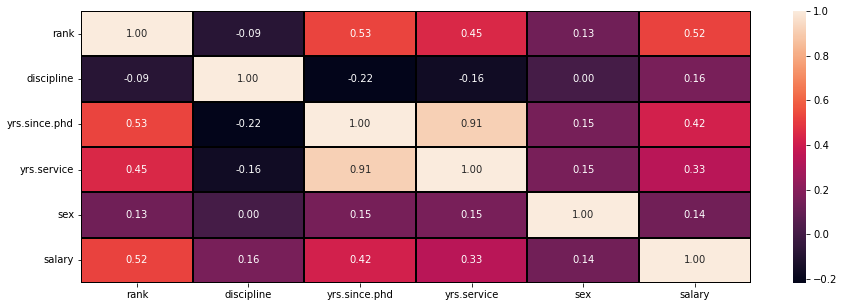

In [15]:
#will plot heatmap to see the visualization of correlation for more clarity
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor='black',fmt='0.2f')

we can clearly see in the above heatmap visulization that discipline & sex are having negative correlation w.r.t. salary(Target Variable). But since discipline & sex were the categorical object variables earlier hence we will not consider the both for making correlation prediction. Ergo, will not drop any column for the same.

In [16]:
#will check correlation w.r.t. Target 
df.corr()['salary']

rank             0.522207
discipline       0.156084
yrs.since.phd    0.419231
yrs.service      0.334745
sex              0.138610
salary           1.000000
Name: salary, dtype: float64

In [17]:
#we can also sort the above values of correlation in ascending or decending order
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

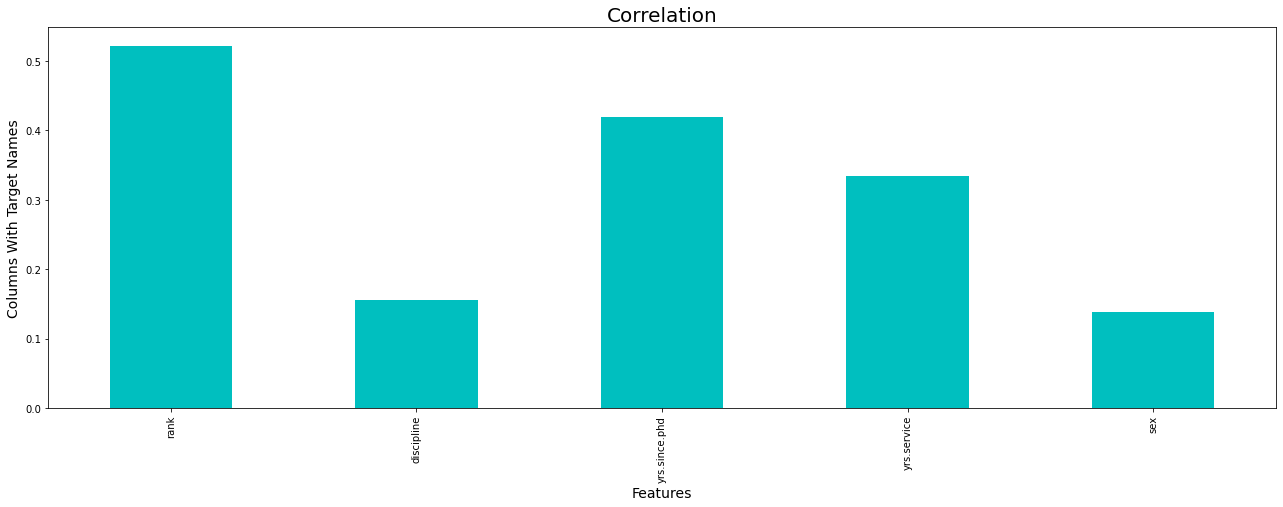

In [18]:
#we can also check the multicollinearirty with this visulaization 
plt.figure(figsize=(22,7))
df.corr()['salary'].drop(['salary']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Columns With Target Names',fontsize=14)
plt.title('Correlation',fontsize=20)
plt.show()

The above graph is clearly showing us that all the independent variables are giving different infromation to the target variables as they all are not equally correlated w.r.t. Target variables

### Skewness

In [19]:
#now will check skewness
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

Will set the threshold value to (+-0.5). As we can see here rank,yrs.service,sex & salary are having skewness either left or right hand side.
But as rank & sex are the categorical variables earlier then will not opearte skewness on both. Whereas salary is the target variable so will left it too. Ergo,will remove skewness for yrs.service.

### Univariate Data Visualization for Skewness

<AxesSubplot:xlabel='rank', ylabel='Density'>

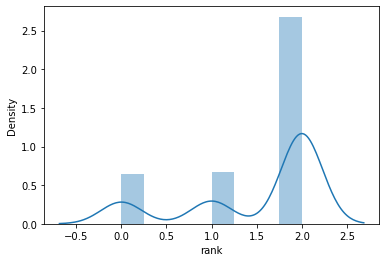

In [22]:
sns.distplot(df['rank'])

since there is -ve skewness hence distribution skewed in left hand side

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

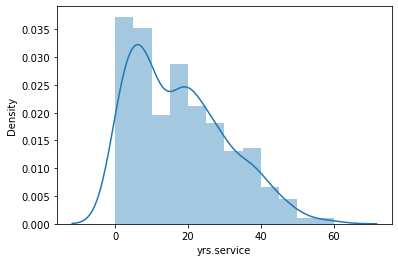

In [23]:
sns.distplot(df['yrs.service'])

since there is +ve skewness hence distribution skewed in right hand side

<AxesSubplot:xlabel='sex', ylabel='Density'>

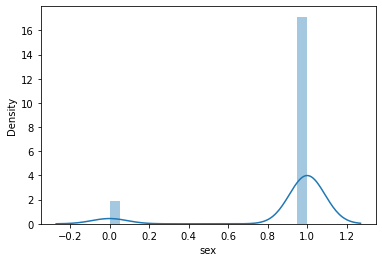

In [24]:
sns.distplot(df['sex'])

since there is -ve skewness hence distribution skewed in left hand side

<AxesSubplot:xlabel='salary', ylabel='Density'>

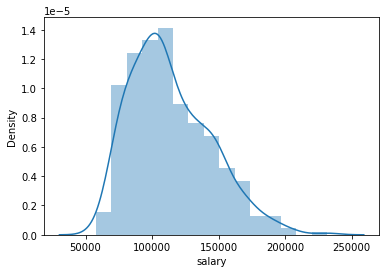

In [25]:
sns.distplot(df['salary'])

since there is +ve skewness hence distribution skewed in right hand side

### Outliers

In [20]:
#will check outliers in the dataset
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
        230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
        341, 358, 361, 364], dtype=int64),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
       dtype=int64))

This is showing all the rows and columns containing outliers.Hence,the values in the rows & columns are greater than the threshold value 3

In [27]:
#outliers present in row 9th
z.iloc[9]

rank             0.649257
discipline       0.915403
yrs.since.phd    0.335245
yrs.service      0.029669
sex              3.029767
salary           0.505557
Name: 9, dtype: float64

In [28]:
##the value of 19th rows and 4th column indicates an outlier
z.iloc[19,4]

3.0297668523315746

### Bi-Variate Data Visualization for Outliers or Abnormal data

<Figure size 1512x648 with 0 Axes>

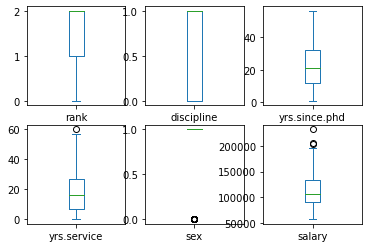

In [30]:
plt.figure(figsize=(21,9))
df.plot(kind='box',subplots=True,layout=(2,3))
plt.show()

We can Clearly see that salary have more outliers as comapre to yrs.service & sex columns,but will consider yrs.service having outliers

### Data Cleaning

In [31]:
#First will remove the negative correlated columns but we have find no columns in this dataset for the same.
#Then remove outliers
#and in last will remove skewness
                                             ##lest go ahead

In [21]:
#removing outliers
df1=df[(z<3).all(axis=1)]
df1

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750.0
1,2,1,20,16,1,173200.0
2,1,1,4,3,1,79750.0
3,2,1,45,39,1,115000.0
4,2,1,40,41,1,141500.0
...,...,...,...,...,...,...
392,2,0,33,30,1,103106.0
393,2,0,31,19,1,150564.0
394,2,0,42,25,1,101738.0
395,2,0,25,15,1,95329.0


In [22]:
#This shows we have lost 43 rows in this process
print(df.shape)
print(df1.shape)

(397, 6)
(354, 6)


In [23]:
loss_percentage=(397-354)/397*100
loss_percentage

10.831234256926953

Since this is showing us that more than 10% of the data has been lost in this process which is not good for analysis.Hence will not drop any outliers

### Moving into Machine Learning Portion

In [24]:
#Now we are seperating Feature variables and Target Variables
x=df.drop('salary',axis=1)
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2,1,19,18,1
1,2,1,20,16,1
2,1,1,4,3,1
3,2,1,45,39,1
4,2,1,40,41,1
...,...,...,...,...,...
392,2,0,33,30,1
393,2,0,31,19,1
394,2,0,42,25,1
395,2,0,25,15,1


In [25]:
#Target Variable
y=df['salary']
y

0      139750.0
1      173200.0
2       79750.0
3      115000.0
4      141500.0
         ...   
392    103106.0
393    150564.0
394    101738.0
395     95329.0
396     81035.0
Name: salary, Length: 397, dtype: float64

In [26]:
print(x.shape)
print(y.shape)

(397, 5)
(397,)


In [27]:
#Now will use standard scalar technique to make this data Normally distributed
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [28]:
m=sc.fit_transform(x)
print('Mean is-',m.mean())
print('The standard deviation is-',m.std())

Mean is- -2.147736228997784e-17
The standard deviation is- 1.0


As we can see that mean is almost zero and standard deviation is 1, hence this dataset is normally distributed and mean=0 and std=1 acheived.
Now we can move ahead to train and test the model with different algorithm

In [29]:
#will try to findout the best random_state value
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i}, the training accuracy is- {r2_score(pred_train,y_train)}')
    print(f'At random state {i}, the testing accuracy is- {r2_score(pred_test,y_test)}')
    print('\n')

At random state 0, the training accuracy is- -0.8377666739956977
At random state 0, the testing accuracy is- -0.1658726592999651


At random state 1, the training accuracy is- -0.632848023188131
At random state 1, the testing accuracy is- -0.6499887639030733


At random state 2, the training accuracy is- -0.43765270918570365
At random state 2, the testing accuracy is- -0.5541238185672483


At random state 3, the training accuracy is- -0.5976047617128151
At random state 3, the testing accuracy is- -0.8542751996910842


At random state 4, the training accuracy is- -0.598434407364093
At random state 4, the testing accuracy is- -1.2240114174691135


At random state 5, the training accuracy is- -0.3825774527529415
At random state 5, the testing accuracy is- -0.34128856574909205


At random state 6, the training accuracy is- -0.6521105817593706
At random state 6, the testing accuracy is- -0.866988194597528


At random state 7, the training accuracy is- -0.8360180802231678
At random state 7, 

Here the training and testing accuracy is coming in negative which indicates that model is not accurate

In [30]:
lr.score(x_train,y_train)

0.3767393671050666

As we can see that the training accuracy score is very less hence machine will not work significantly. 

In [36]:
from sklearn.model_selection import cross_val_score
for k in range(2,10):
    cvscore=cross_val_score(lr,x,y,cv=k)
    print(f'At K Fold {k} accuracy score is-',cvscore.mean())
    std=cvscore.std()

At K Fold 2 accuracy score is- 0.32708011674065113
At K Fold 3 accuracy score is- 0.3203328673059879
At K Fold 4 accuracy score is- 0.3218196693768362
At K Fold 5 accuracy score is- 0.2956992866387177
At K Fold 6 accuracy score is- 0.33096341839295546
At K Fold 7 accuracy score is- 0.32577044199965366
At K Fold 8 accuracy score is- 0.3310060584513582
At K Fold 9 accuracy score is- 0.30439112398893714


Kindly help me as am getting negative accuracy score